# Getting Stock Price Data

In [1]:
import datetime as dt # so that we can set some starting and end dates for the data we can pull 

In [2]:
import matplotlib.pyplot as plt # helps in making plots charts graphs 
from matplotlib import style # to make our graphs looks better

In [3]:
import pandas as pd 
import pandas_datareader.data as web # it is used for remote data access for pandas it returns data in pandas dataframe

In [4]:
style.use('ggplot') # one of many styles we are using ggplot

In [5]:
start = dt.datetime(2000,1,1)
end = dt.datetime(2016,12,31)

In [6]:
df = web.DataReader('TSLA', 'yahoo', start, end) # we are using ticker it is symbol for a company for a stock here TSLA is Tesla
# then where we are getting from we are getting from Yahoo and then for what time then we told about start and end time

In [7]:
df.head(6)
df.tail(6)
# it has adj close means adjusted close it is adjusted for **stock splits** this happens when a company decides their
# price maybe its too high per share they say okay every share is two share actually 

# DataFrame has taken Date as a index

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-12-22,209.990005,206.500000,208.220001,208.449997,3111100,208.449997
2016-12-23,213.449997,207.710007,208.000000,213.339996,4662900,213.339996
2016-12-27,222.250000,214.419998,214.880005,219.529999,5915700,219.529999
2016-12-28,223.800003,217.199997,221.529999,219.740005,3782500,219.740005
2016-12-29,219.199997,214.119995,218.559998,214.679993,4035900,214.679993
2016-12-30,217.500000,211.679993,216.300003,213.690002,4642600,213.690002



# Handling Data and Graphing

In [8]:
df.to_csv('tsla.csv') # to convert the dataframe into CSV

In [9]:
# Reading Csv file 
#df = pd.read_csv('C:/Users/PARV/Python_code/Sentdex/tsla.csv')
df = pd.read_csv('tsla.csv')
print(df.head()) 
# Here we have the CSV where index is not Date

         Date   High        Low       Open      Close    Volume  Adj Close
0  2010-06-29  25.00  17.540001  19.000000  23.889999  18766300  23.889999
1  2010-06-30  30.42  23.299999  25.790001  23.830000  17187100  23.830000
2  2010-07-01  25.92  20.270000  25.000000  21.959999   8218800  21.959999
3  2010-07-02  23.10  18.709999  23.000000  19.200001   5139800  19.200001
4  2010-07-06  20.00  15.830000  20.000000  16.110001   6866900  16.110001


In [10]:
# if we want date time index in CSV we need to do parse_dates = True (to make pandas attempt to infer the format of date time ) 
# and we need to specify the index so index_col = 0 means it will pull first column and read as a index

df = pd.read_csv('tsla.csv', parse_dates = True, index_col = 0)
print(df.head())

# so we have date time index 

             High        Low       Open      Close    Volume  Adj Close
Date                                                                   
2010-06-29  25.00  17.540001  19.000000  23.889999  18766300  23.889999
2010-06-30  30.42  23.299999  25.790001  23.830000  17187100  23.830000
2010-07-01  25.92  20.270000  25.000000  21.959999   8218800  21.959999
2010-07-02  23.10  18.709999  23.000000  19.200001   5139800  19.200001
2010-07-06  20.00  15.830000  20.000000  16.110001   6866900  16.110001


# Visualization

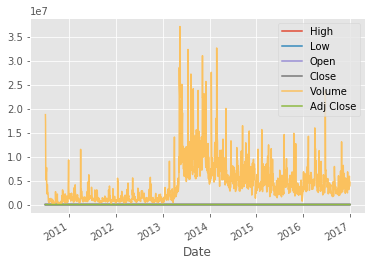

In [11]:
df.plot() # will pull all attributes and plot it 

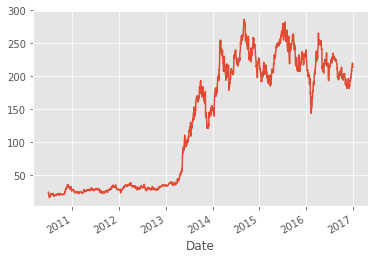

In [12]:
df['Adj Close'].plot() #will only plot Adj Close

In [13]:
print(df[['Open','Close']].head()) # printing only two columns from the data frame

                 Open      Close
Date                            
2010-06-29  19.000000  23.889999
2010-06-30  25.790001  23.830000
2010-07-01  25.000000  21.959999
2010-07-02  23.000000  19.200001
2010-07-06  20.000000  16.110001
